In [7]:
import pandas as pd

df = pd.read_csv('dados_ficticios.csv')

In [8]:
print(df.head(10))


  Categoria    Valor_1     Valor_2  Valor_3        Data
0         C  53.417560  126.034826        1  2023-01-01
1         D  68.761708  131.230224        2  2023-01-02
2         A  59.504238  100.640083        6  2023-01-03
3         C  44.230963   84.931643        5  2023-01-04
4         C  41.015853  109.199443        9  2023-01-05
5         D  54.919192   86.445693        5  2023-01-06
6         A  36.797668  140.267745        2  2023-01-07
7         A  68.314588  102.730707        4  2023-01-08
8         C  61.794401   92.693569        9  2023-01-09
9         B  45.308243  103.693606        1  2023-01-10


In [9]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Categoria  1000 non-null   object 
 1   Valor_1    1000 non-null   float64
 2   Valor_2    1000 non-null   float64
 3   Valor_3    1000 non-null   int64  
 4   Data       1000 non-null   object 
dtypes: float64(2), int64(1), object(2)
memory usage: 39.2+ KB
None


In [10]:
print(df.describe())


           Valor_1      Valor_2      Valor_3
count  1000.000000  1000.000000  1000.000000
mean     50.401664   100.759179     5.014000
std      10.012925    19.673028     2.588533
min      21.037446    39.609757     1.000000
25%      43.749954    87.668313     3.000000
50%      50.366335   100.416802     5.000000
75%      56.815984   113.760305     7.000000
max      80.788808   163.862151     9.000000


In [11]:
filtro = df[(df['Categoria'] == 'A') & (df['Valor_1'] > 60)]
print(filtro.head())

   Categoria    Valor_1     Valor_2  Valor_3        Data
7          A  68.314588  102.730707        4  2023-01-08
30         A  65.511520  101.140262        2  2023-01-31
35         A  67.553408  121.450147        6  2023-02-05
74         A  69.647251   97.230880        5  2023-03-16
87         A  63.668743  100.293764        1  2023-03-29


In [12]:
df['Data'] = pd.to_datetime(df['Data'])


In [13]:
filtro_data = df[(df['Data'] >= '2023-05-01') & (df['Data'] <= '2023-05-31')]
print(filtro_data.head())

    Categoria    Valor_1     Valor_2  Valor_3       Data
120         D  44.076061  113.927749        6 2023-05-01
121         A  41.360092  119.106104        5 2023-05-02
122         B  50.485216  101.768138        9 2023-05-03
123         C  41.690499  129.550602        2 2023-05-04
124         A  52.704568   77.166218        8 2023-05-05


In [14]:
df = df.rename(columns={'Valor_1': 'estoque da loja1', 'Valor_2': 'Estoque da loja2', 'Valor_3': 'vendas'})

In [15]:
df.head(10)

,Categoria,estoque da loja1,Estoque da loja2,vendas,Data
0,C,53.417560,126.034826,1,2023-01-01
1,D,68.761708,131.230224,2,2023-01-02
2,A,59.504238,100.640083,6,2023-01-03
3,C,44.230963,84.931643,5,2023-01-04
4,C,41.015853,109.199443,9,2023-01-05
5,D,54.919192,86.445693,5,2023-01-06
6,A,36.797668,140.267745,2,2023-01-07
7,A,68.314588,102.730707,4,2023-01-08
8,C,61.794401,92.693569,9,2023-01-09
9,B,45.308243,103.693606,1,2023-01-10


In [16]:
agrupado_media = df.groupby('Categoria')[['estoque da loja1', 'Estoque da loja2']].mean() 
print(agrupado_media)

           estoque da loja1  Estoque da loja2
Categoria                                    
A                 50.290689        100.277620
B                 50.749158         99.837544
C                 50.652042        102.046140
D                 50.011022        100.893619


In [17]:
df_agrupamento = df.groupby('Categoria').agg({'vendas': 'sum', 'Categoria': 'count'}).rename(columns={'Categoria': 'Contagem de agrupamento'})


In [18]:
df_agrupamento

,vendas,Contagem de agrupamento
Categoria,,
A,1279,258
B,1188,230
C,1182,232
D,1365,280


In [19]:
import matplotlib.pyplot as plt

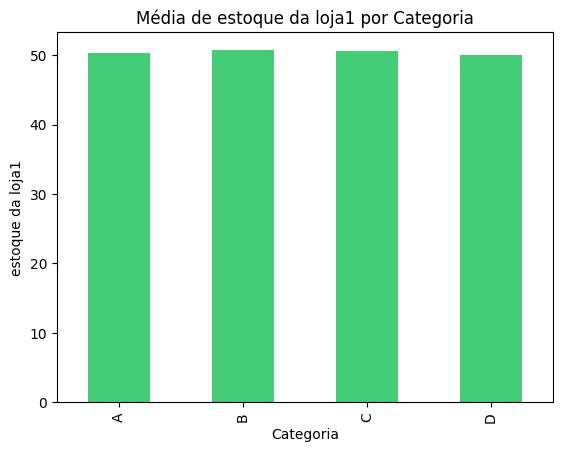

In [20]:
media_valor_1 = df.groupby('Categoria')['estoque da loja1'].mean()

media_valor_1.plot(kind='bar', color='#4c7', title='Média de estoque da loja1 por Categoria')

plt.xlabel('Categoria')

plt.ylabel('estoque da loja1')

plt.show()